## Packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

## Loading of the dataset and the displaying of variables
The table of the first 5 records of the dataset and the last 5 records of the dataset can be seen below.

In [4]:
df = pd.read_csv("Heart Attack Data Set spreadsheet.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df.info() # There are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
len(df) #Length is the same as in the spreadsheet

303

In [11]:
df.shape # We have 303 rows and 14 columns

(303, 14)

In [13]:
df_duplicates = (df.duplicated() == True).sum() #Checking the total number of duplicates
df_duplicates

1

In [15]:
duplicate_index = df[df.duplicated()] #Getting the duplicate index
duplicate_index

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [17]:
df = df.drop(index = 164) #Dropping the duplicate index
df.shape #We are one row lighter now

(302, 14)

## Data (Variable) Description
Basic statistics of our data for all the numerical attributes. Based on observations, all our attributes are numerical (int and float) as can be seen in the below results.

In [19]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [21]:
df.describe() #Basic statistics for all our attributes

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Variable Correlation
Based on the heatmap below, the correlation between these attributes is mostly around -0.2 to 0.2, there're a few attributes that surpass this range from both the negative and positive side of which this indicate a weak and strong correlation respectively.

In [23]:
correlation = df[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]].corr() #Attibutes of our dataset that we are determining the correlation for
correlation = correlation.round(3) #Rounding the values to 3 decimal places for proper readability
# correlation

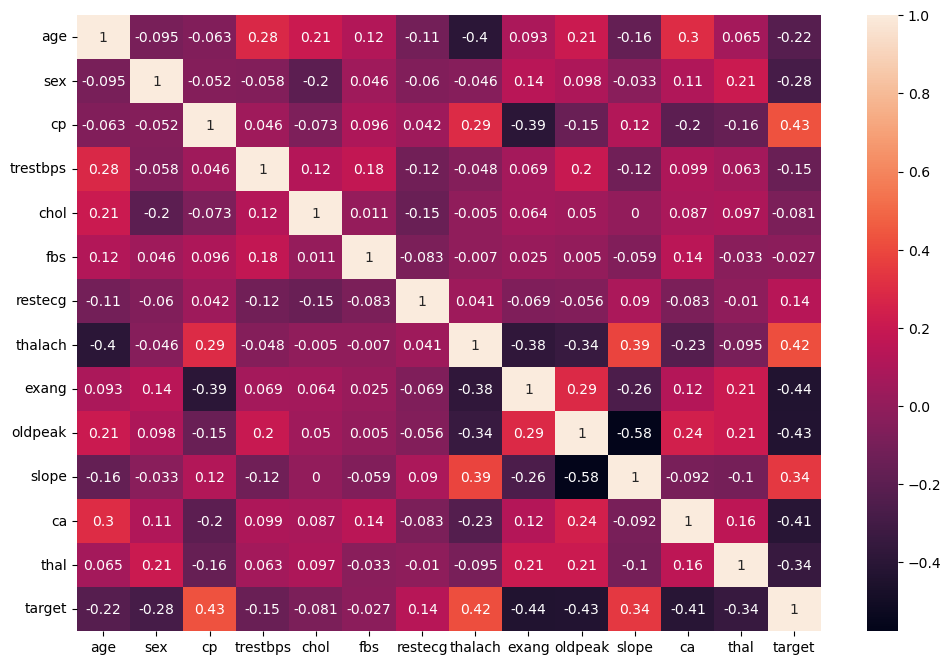

In [25]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot = True)
plt.savefig("correlation.png", format="png")
plt.show()

In [38]:
# df["age"]

In [40]:
# df["chol"]

## Distribution of Age and Cholesterol levels

### Age
As can be seen below, age has a normal distribution with age 60 being the most common. There are no potential outliers shown by the distribution.

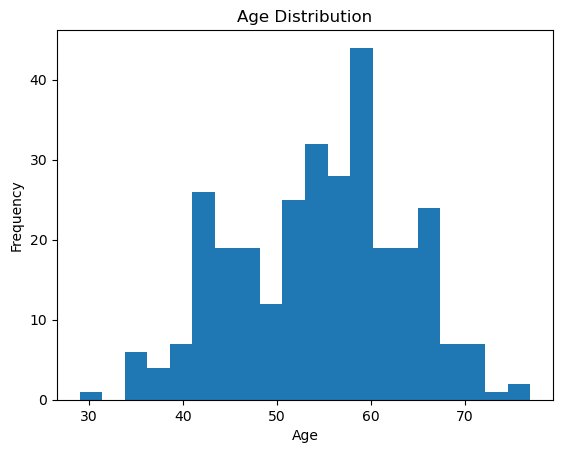

In [27]:
df["age"].plot(kind="hist", bins = 20, title="Age Distribution", xlabel="Age") #Age distribution
plt.savefig("age.png", format="png")

### Cholesterol Levels
Cholesterol levels distribution is skewed to the right with the most common cholesterol level ranging between 200 - 280 mg/dl. This distribution also shows that there are potential outliers that are ranging between 390 - 560 mg/dl.

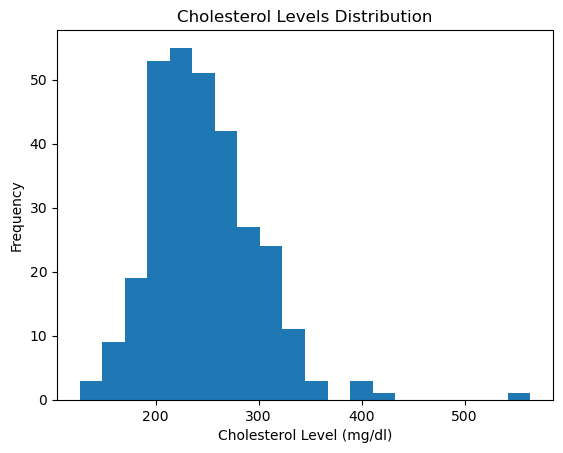

In [29]:
df["chol"].plot(kind="hist", bins=20, title="Cholesterol Levels Distribution", xlabel = "Cholesterol Level (mg/dl)")
plt.savefig("cholesterol.png", format="png")

## Distribution of heart disease by gender
Females will be recognized as 0 and males will be 1. For the Heart Disease variable, it is assumed that 0 means "no heart disease" and 1 means "heart disease is present".

In [31]:
#Insurance calculation
print("Total females with heart disease :",df[df["target"] == 1][df["sex"] == 0]["sex"].count()) #Heart Disease and female
print("Total males with heart disease :",df[df["target"] == 1][df["sex"] == 1]["sex"].count()) #Heart Disease and Male

Total females with heart disease : 72
Total males with heart disease : 92


In [33]:
df["sex"].unique() #So we have two unique values

array([1, 0], dtype=int64)

In [35]:
df["target"].unique() #So we have two unique values

array([1, 0], dtype=int64)

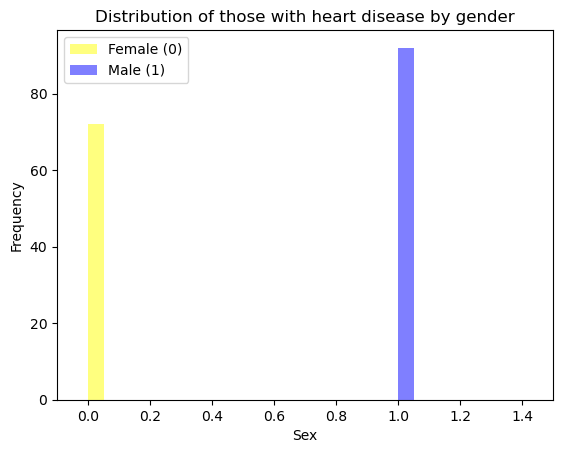

In [37]:
df[df["target"] == 1][df["sex"] == 0]["sex"].plot(kind="hist", bins=20, alpha=0.5, color="yellow", label="Female (0)")
df[df["target"] == 1][df["sex"] == 1]["sex"].plot(kind="hist", bins=20, alpha=0.5, color="blue", label="Male (1)")

plt.title("Distribution of those with heart disease by gender")
plt.xlabel("Sex")
plt.legend(loc="upper left")
plt.xlim(-0.1,1.5)
plt.savefig("heart_per_gender.png", format="png")
plt.show()

## Distribution of heart disease by Resting ECG
This attribute contains 3 different categories of which the classification of those categories include 0 that refers to "Normal", 1 indicates "ST-T wave abnormality" and 2 which indicates "Definite left ventricular hypertrophy".

In [39]:
df["restecg"].unique() #So we have 3 unique values

array([0, 1, 2], dtype=int64)

In [41]:
print("Normal :",df[df["target"] == 1][df["restecg"] == 0]["restecg"].count()) #Heart disease and Normal
print("ST-T wave abnormality :",df[df["target"] == 1][df["restecg"] == 1]["restecg"].count()) #Heart disease and ST-T wave abnormality
print("Definite left ventricular hypertrophy :",df[df["target"] == 1][df["restecg"] == 2]["restecg"].count()) #Heart disease and Definite left ventricular hypertrophy

Normal : 68
ST-T wave abnormality : 95
Definite left ventricular hypertrophy : 1


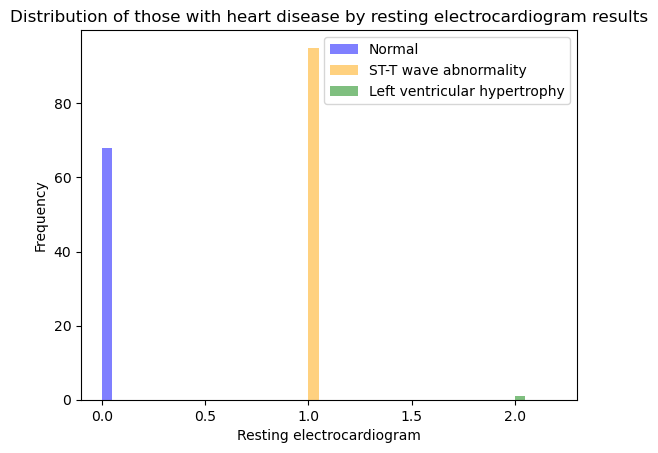

In [43]:
df[df["target"] == 1][df["restecg"] == 0]["restecg"].plot(kind="hist", bins=20, alpha=0.5, color="blue", label="Normal")
df[df["target"] == 1][df["restecg"] == 1]["restecg"].plot(kind="hist", bins=20, alpha=0.5, color="orange", label="ST-T wave abnormality")
df[df["target"] == 1][df["restecg"] == 2]["restecg"].plot(kind="hist", bins=20, alpha=0.5, color="green", label="Left ventricular hypertrophy")

plt.title("Distribution of those with heart disease by resting electrocardiogram results")
plt.xlabel("Resting electrocardiogram")
plt.legend(loc="upper right")
plt.xlim(-0.1,2.3)
plt.savefig("heart_by_restecg.png", format="png")
plt.show()

## Logistic regression model
The features are declared as X variable of which they include all the attributes except the target attribute. The target is declared as the y variable. The data has been split into 80% training data and 20% testing data. The model that is utilized is logistic regression of which this model is trained using the 80% of the training data. After the training of the data, the accuracy of the model stands at 85.25% when predicting values that it was not trained with (testing data).

In [45]:
X = df.drop(["target"], axis =1) #features
y = df.loc[:, df.columns == "target"] #target
# print(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)#80% training, 20% testing data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(241, 13) (241, 1)
(61, 13) (61, 1)


In [49]:
log_model = LogisticRegression() #Defining the model
log_model.fit(X_train, y_train) #Training the model

LogisticRegression()

In [51]:
y_pred = log_model.predict(X_test)
print(y_pred)

[0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1]


In [55]:
model_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : {:.2f}%".format(model_accuracy*100))

Accuracy : 85.25%
